<a href="https://colab.research.google.com/github/marekhennig/175IC-machine-learning/blob/main/Zad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: catego

ValueError: ignored

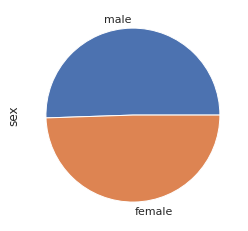

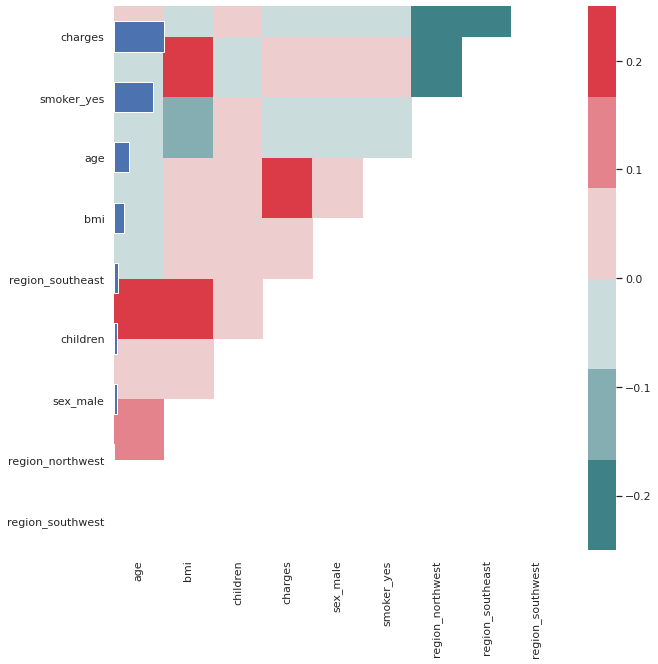

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

np.random.seed(42)
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()
df = df_raw.copy()
df.info()
df[df.duplicated()]
df.drop_duplicates()
for col in ['sex', 'smoker', 'region']:
    df[col] = df[col].astype('category')
df.info()
df.sex.value_counts()
df.sex.value_counts().plot(kind='pie')
df.smoker.value_counts()
#df.smoker.value_counts().plot(kind='pie')
px.histogram(df, x='charges', width=700, height=400, nbins=50, facet_col='smoker', facet_row='sex')
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies
corr = df_dummies.corr()
corr
sns.set(style="white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(200,10)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.25, vmin=-0.25)
df_dummies.corr()['charges'].sort_values(ascending=False)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')
df['sex_male'] = df['sex'].apply(lambda x: 1 if 'male' in x else 0)
df['is_smoker'] = df['smoker'].apply(lambda x: 1 if 'yes' in x else 0)
df['region_northwest'] = df['region'].apply(lambda x: 1 if 'northwest' in x else 0)
df['region_southeast'] = df['region'].apply(lambda x: 1 if 'southeast' in x else 0)
df['region_southwest'] = df['region'].apply(lambda x: 1 if 'southwest' in x else 0)



df1=df['charges']

df2=df[['age','sex_male','bmi','children','is_smoker', 'region_northwest', 'region_southeast','region_southwest']]
X_train, X_test, y_train, y_test = train_test_split(df2, df1,  train_size=0.7)

X_train_ols = sm.add_constant(X_train.values)
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors =list(X_train.columns)+['const']
print(ols.summary(xname = predictors))

regressor = LinearRegression();
regressor.fit(X_train, y_train)
print(f'R2 score: {regressor.score(X_test,y_test):.4f}')
regressor.predict(X_test)
y_pred = regressor.predict(X_test)
y_pred[:10]

y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()
predictions.error.plot(kind='hist',bins = 30)

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE wyniosi: {mae:.2f}')


